## Diabetes veri seti üzerinden KNN Regressor ile model oluşturma

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [50]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [51]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [52]:
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [67]:
print(data.isnull().sum())
## eksik değer yok gibi görünüyor fakat yazılan 0 değerleri aslında eksik veri demektir.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [53]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [55]:
#Sıfır değerler eksik veri olarak kabul edilir. Bunları her sütunun medyanı ile dolduruyorum.

# Eksik veri analizi ve sıfır değerlerin sayısı

columns_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
missing_counts = {column: (data[column] == 0).sum() for column in columns_with_missing}

print("Sıfır olarak kabul edilen eksik değerlerin sayısı:")

for column, count in missing_counts.items():
    print(f"{column}: {count}")


Sıfır olarak kabul edilen eksik değerlerin sayısı:
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


In [56]:
#Eksik verileri medyan ile doldurma

for column in columns_with_missing:
    median_value = data[column].median()
    data[column] = data[column].replace(0, median_value)


In [57]:
#Bağımsız değişkenler (X) ve hedef değişken (y) ayırma

X = data.drop(columns=['Outcome'])  # Outcome hedef değişkeni hariç 
y = data['Age']  # Hedef değişkeni sürekli bir değer olarak seçiyoruz (örneğin, 'Age')


In [58]:
#Veriyi eğitim ve test setlerine ayırma (%80 eğitim, %20 test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
#Veriyi ölçeklendirme

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  


In [60]:
#KNN Regressor modelini oluşturma ve eğitme

# k=5 seçtim

knn_model = KNeighborsRegressor(n_neighbors=5)  
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [61]:
y_pred = knn_model.predict(X_test_scaled)


In [62]:
#Model performansını değerlendirme

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performansı:")
print(f"Ortalama Kare Hatası (MSE): {mse}")
print(f"R2 Skoru: {r2}")



Model Performansı:
Ortalama Kare Hatası (MSE): 22.172207792207793
R2 Skoru: 0.8613095196648447


In [63]:
#Farklı K değerlerini test etme

k_values = range(1, 21)
mse_values = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    mse_values.append(mean_squared_error(y_test, y_pred))


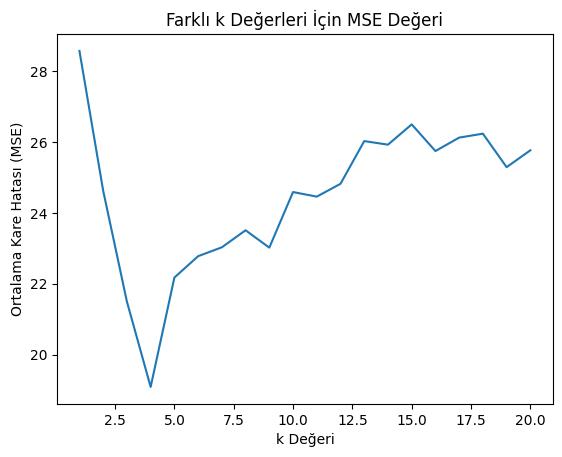

In [64]:
# En iyi k değeri için grafik çizme
plt.plot(k_values, mse_values)
plt.xlabel('k Değeri')
plt.ylabel('Ortalama Kare Hatası (MSE)')
plt.title('Farklı k Değerleri İçin MSE Değeri')
plt.show()

In [65]:
# En iyi k değerini seçme

best_k = k_values[mse_values.index(min(mse_values))]
print(f"En iyi k değeri: {best_k}")

En iyi k değeri: 4


In [66]:
# En iyi k değeri ile modeli yeniden eğitme

knn_best_model = KNeighborsRegressor(n_neighbors=best_k)
knn_best_model.fit(X_train_scaled, y_train)
y_pred_best = knn_best_model.predict(X_test_scaled)

# En iyi modelin performansını değerlendirme

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"En iyi k değeri ile Model Performansı:")
print(f"Ortalama Kare Hatası (MSE): {mse_best}")
print(f"R2 Skoru: {r2_best}")

En iyi k değeri ile Model Performansı:
Ortalama Kare Hatası (MSE): 19.085633116883116
R2 Skoru: 0.8806165065162646


## `Sonuçlar`

- İlk olarak, veri setini inceledim ve eksik veriler olduğunu fark ettim. Ancak sıfır değerlerini medyan ile doldurarak bu eksiklikleri giderdim.

- Ardından, veriyi eğitim ve test setlerine ayırarak, veri ölçeklendirme işlemi yaptım. Bunun ardından, KNN Regressor modelimi k=5 ile eğitmeye başladım ve ilk sonuçları aldım. Ancak modelin doğruluğu konusunda daha iyi bir sonuç almak için k değerini optimize etmeye karar verdim.

- Farklı k değerlerini test ettiğimde, k=4 ile en iyi sonuca ulaştım. Bu k değeriyle modelin doğruluğu daha yüksek çıktı ve MSE (Ortalama Kare Hatası) daha düşük oldu. Sonuç olarak, k=4 ile modelimi yeniden eğittim ve sonuçların daha iyi olduğunu gözlemledim.

- Modelin performansı oldukça tatmin edici oldu. R2 skoru ve MSE ile modelin doğruluğunu ve tahmin yeteneğini değerlendirdim. Yüksek R2 skoru ve düşük MSE değeri, modelin diyabet verilerini başarılı bir şekilde tahmin ettiğini gösteriyor.





